In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def load_data():
    df = pd.read_csv("../files/input/shipping-data.csv")
    return df


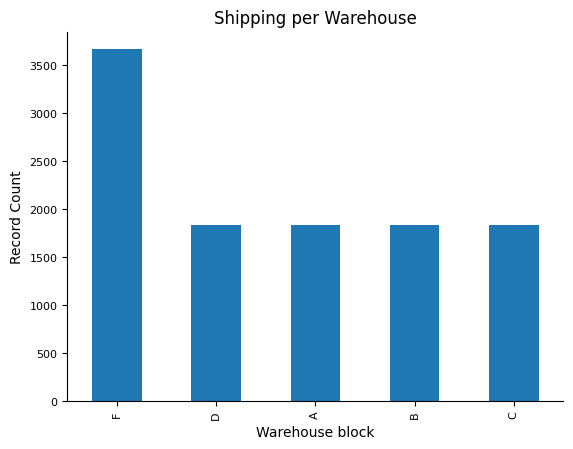

In [3]:
def create_visual_for_shipping_per_warehouse(df):
    df = df.copy()
    plt.Figure()
    counts = df.Warehouse_block.value_counts()
    counts.plot.bar(
        title="Shipping per Warehouse",
        xlabel="Warehouse block",
        ylabel="Record Count",
        color="tab:blue",
        fontsize=8,
    )
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)

    import os
    docs_folder = "../docs"
    if not os.path.exists(docs_folder):
    # Crear la carpeta
        os.makedirs(docs_folder)
    else:
        print(f"La carpeta '{docs_folder}' ya existe.")

    plt.savefig("../docs/shipping_per_warehouse.png")

df = load_data()
create_visual_for_shipping_per_warehouse(df)


La carpeta '../docs' ya existe.


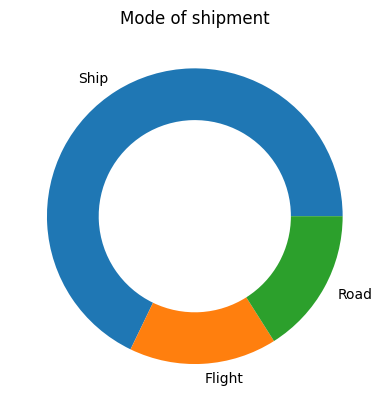

In [4]:
def create_visual_for_mode_of_shipment(df):
    df = df.copy()
    plt.Figure()
    counts = df.Mode_of_Shipment.value_counts()
    counts.plot.pie(
        title="Mode of shipment",
        wedgeprops=dict(width=0.35),
        ylabel="",
        colors=["tab:blue", "tab:orange", "tab:green"],
    )

    import os
    docs_folder = "../docs"
    if not os.path.exists(docs_folder):
    # Crear la carpeta
        os.makedirs(docs_folder)
    else:
        print(f"La carpeta '{docs_folder}' ya existe.")

    plt.savefig("../docs/mode_of_shipment.png")

df = load_data()
create_visual_for_mode_of_shipment(df)

In [5]:
df = load_data()
print(df.columns)

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')


La carpeta '../docs' ya existe.


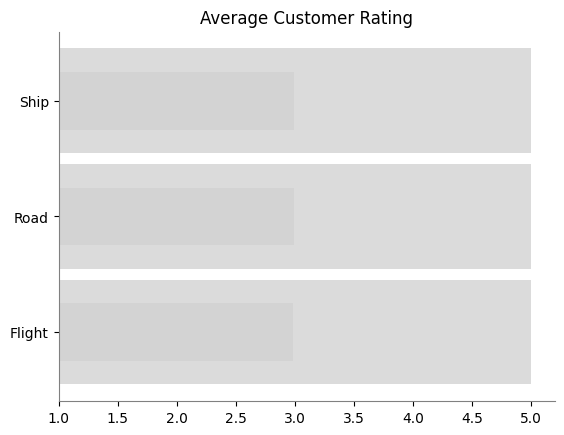

In [6]:
def create_visual_for_average_customer_rating(df):
    df = df.copy()
    plt.Figure()
    df = (
        df[["Mode_of_Shipment", "Customer_rating"]]
        .groupby("Mode_of_Shipment")
        .describe()
    )
    df.columns = df.columns.droplevel()
    df = df[["mean", "min", "max"]]
    plt.barh(
        y=df.index.values,
        width=df["max"].values - 1,
        left=df["min"].values,
        height=0.9,
        color="lightgray",
        alpha=0.8,
    )
    colors=[
        "tab:green" if value >= 3.0 else "tab:orange" for value in df["mean"]
    ]
    plt.barh(
        y=df.index.values,
        width=df["mean"].values - 1,
        left=df["min"].values,
        height=0.5,
        color="lightgray",
        alpha=1.0,
    )
    plt.title("Average Customer Rating")
    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)

    import os
    docs_folder = "../docs"
    if not os.path.exists(docs_folder):
    # Crear la carpeta
        os.makedirs(docs_folder)
    else:
        print(f"La carpeta '{docs_folder}' ya existe.")
    
    plt.savefig("../docs/average_customer_rating.png")

df = load_data()
create_visual_for_average_customer_rating(df)


La carpeta '../docs' ya existe.


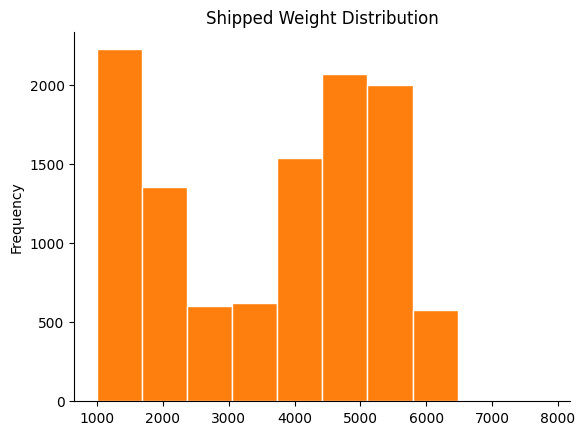

In [7]:
def create_visual_for_weight_distribution(df):
    df = df.copy()
    plt.Figure()
    df.Weight_in_gms.plot.hist(
        title="Shipped Weight Distribution",
        color="tab:orange",
        edgecolor="white",
    )
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)

    import os
    docs_folder = "../docs"
    if not os.path.exists(docs_folder):
    # Crear la carpeta
        os.makedirs(docs_folder)
    else:
        print(f"La carpeta '{docs_folder}' ya existe.")

    plt.savefig("../docs/weight_distribution.png")

df = load_data()
create_visual_for_weight_distribution(df)
    

La carpeta '../docs' ya existe.
La carpeta '../docs' ya existe.
La carpeta '../docs' ya existe.
La carpeta '../docs' ya existe.


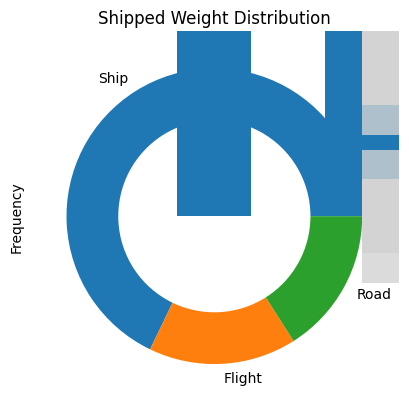

In [8]:
df=load_data()
create_visual_for_shipping_per_warehouse(df)
create_visual_for_mode_of_shipment(df)
create_visual_for_average_customer_rating(df)
create_visual_for_weight_distribution(df)

In [9]:
%%writefile index.html

<!DOCTYPE html>
<html>
    <body>
        <h1>Shipping Dashboard Example</h1>
        <div style="width:45%;float:left">
        <img src="shipping_per_warehouse.png" alt="fig 1">
        <img src="mode_of_shipment.png" alt="fig 2">
        <div>
        <div style="width:45%;float:left">
        <img src="average_customer_rating.png" alt="fig 3">
        <img src="weight_distribution.png" alt="fig 4">
        <div>
    <body>    
<html>

Overwriting index.html
